In [130]:
import bql 
import bqviz as bqv
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
bq = bql.Service()

entities = ['MSFT US Equity', 'GE US Equity', 'BAC US Equity']
interval = bq.func.range('2019-01-01', '2019-12-31')
price = bq.data.px_last(dates=interval, frq='D', fill='prev')

request = bql.Request(entities, price)
result = bq.execute(request)

In [131]:
print(result)

In [132]:
# Converting Response object to a DataFrame:

df_main = result[0].df()

In [133]:
#Inspecting DataFrame:

df_main.info()

print('\n')

df_main.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, MSFT US Equity to BAC US Equity
Data columns (total 3 columns):
DATE                                                                    1095 non-null datetime64[ns]
CURRENCY                                                                1095 non-null object
PX_LAST(frq=PER.D,fill=FILL.prev,dates=RANGE(2019-01-01,2019-12-31))    1095 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 34.2+ KB




,DATE,CURRENCY,"PX_LAST(frq=PER.D,fill=FILL.prev,dates=RANGE(2019-01-01,2019-12-31))"
ID,,,
MSFT US Equity,2019-01-01,USD,101.57
MSFT US Equity,2019-01-02,USD,101.12
MSFT US Equity,2019-01-03,USD,97.40
MSFT US Equity,2019-01-04,USD,101.93
MSFT US Equity,2019-01-05,USD,101.93


In [134]:
# Renaming columns and resetting the index column:

col_names = ['Date', 'Currency', 'Close']
df_main.columns = col_names
df_main.reset_index(inplace=True)
                    
df_main.head()

,ID,Date,Currency,Close
0,MSFT US Equity,2019-01-01,USD,101.57
1,MSFT US Equity,2019-01-02,USD,101.12
2,MSFT US Equity,2019-01-03,USD,97.40
3,MSFT US Equity,2019-01-04,USD,101.93
4,MSFT US Equity,2019-01-05,USD,101.93


In [135]:
# Building final DataFrame:

df_final = df_main.pivot('Date', 'ID', 'Close')
df_final.tail()

ID,BAC US Equity,GE US Equity,MSFT US Equity
Date,,,
2019-12-27,35.35,11.18,158.96
2019-12-28,35.35,11.18,158.96
2019-12-29,35.35,11.18,158.96
2019-12-30,35.15,11.08,157.59
2019-12-31,35.22,11.16,157.70


In [136]:
# Cleaning DataFrame (dealing with missing values):

# Removing missing values (rows, axis=0):

df_final.dropna(inplace=True, axis=0)

In [137]:
# Plotting our data using bqv: 

line_plot = bqv.LinePlot(df_final).set_style()
line_plot.show()

GridBox(children=(Figure(animation_duration=500, axes=[Axis(color='white', grid_color='#3c3c3c', grid_lines='d…

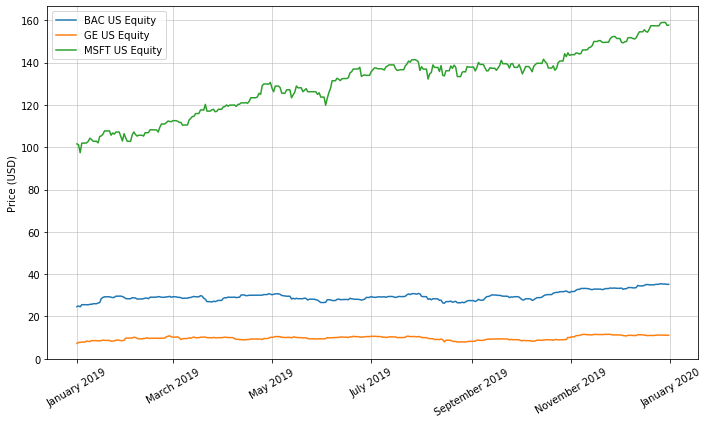

In [138]:
# Plotting our data using matplotlib:

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(format)
plt.plot(df_final.index, df_final)
plt.ylabel('Price (USD)')

labels = df_final.columns

plt.grid(linewidth=0.5)
plt.legend(labels)
plt.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()
